In [1]:
import sys
sys.path.append("../MILESTONE1")

from file import preprocessing, df_suffle

Image mode (Channel Code) RGB
Image_size(Pixels) (2480, 3508)
DPI (301.0, 301.0)


In [2]:
X=[]
y=[]

for idx,row in df_suffle.iterrows():
    img=preprocessing(row['Image'])
    X.append(img)
    y.append(row['Brand'])

In [3]:
import numpy as np
import cv2
X=np.array(X)
y=np.array(y)

In [4]:
def noise_extract(img):
    img = img.squeeze()
    img_uint8 = (img * 255).astype(np.uint8)

    
    smooth = cv2.GaussianBlur(img_uint8, (5,5), 0)

    noise = img_uint8.astype(np.float32) - smooth.astype(np.float32)
    return noise


In [7]:
!pip install --force-reinstall matplotlib opencv-python scikit-image


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/e2/e2/fd0bbadf837f81edb0d208ba8f8cb552874c3b16e27cb91a31977d90875d/matplotlib-3.10.8-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ---------------------- --------------- 30.7/52.8 kB 259.2 kB/s eta 0:00:01
     ---------------------- --------------- 30.7/52.8 kB 259.2 kB/s eta 0:00:01
     ---------------------- --------------- 30.7/52.8 kB 259.2 kB/s eta 0:00:01
     ---------------------- --------------- 30.7/52.8 kB 259.2 kB/s eta 0:00:01
     ---------------------- --------------- 30.7/52.8 kB 259.2 kB/s eta 0:00:01
     ---------------------- --------------- 30.7/52.8 kB 259.2 kB/s eta 0:00:01
     ------------------------------ -------- 41.0/52.8 kB 93.4 kB/s eta 0:00:01
     --

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\anaconda3\\envs\\testrav\\Lib\\site-packages\\~il\\_imaging.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




   ------------------------ --------------- 5.0/8.1 MB 986.1 kB/s eta 0:00:04
   ------------------------ --------------- 5.0/8.1 MB 980.1 kB/s eta 0:00:04
   ------------------------ --------------- 5.1/8.1 MB 982.0 kB/s eta 0:00:04
   ------------------------- -------------- 5.2/8.1 MB 991.9 kB/s eta 0:00:03
   ------------------------- -------------- 5.3/8.1 MB 998.6 kB/s eta 0:00:03
   -------------------------- ------------- 5.3/8.1 MB 1.0 MB/s eta 0:00:03
   -------------------------- ------------- 5.4/8.1 MB 1.0 MB/s eta 0:00:03
   -------------------------- ------------- 5.5/8.1 MB 1.0 MB/s eta 0:00:03
   --------------------------- ------------ 5.5/8.1 MB 1.0 MB/s eta 0:00:03
   --------------------------- ------------ 5.5/8.1 MB 1.0 MB/s eta 0:00:03
   --------------------------- ------------ 5.6/8.1 MB 1.0 MB/s eta 0:00:03
   --------------------------- ------------ 5.7/8.1 MB 1.0 MB/s eta 0:00:03
   ---------------------------- ----------- 5.7/8.1 MB 1.0 MB/s eta 0:00:03
 

In [5]:
import matplotlib.pyplot as plt

def v_noise(img, title="Noise Map"):
    noise = noise_extract(img)

    plt.figure(figsize=(3,3))
    plt.imshow(noise, cmap='gray')
    plt.title(title)
    plt.show()


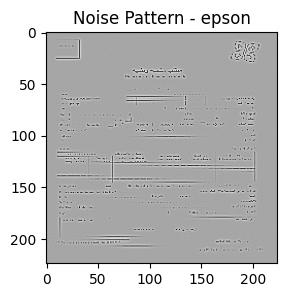

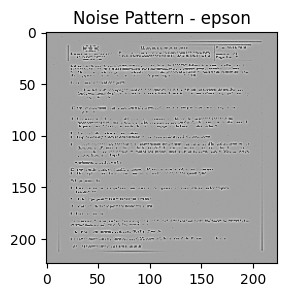

In [6]:
v_noise(X[0], title=f"Noise Pattern - {y[0]}")
v_noise(X[50], title=f"Noise Pattern - {y[50]}")

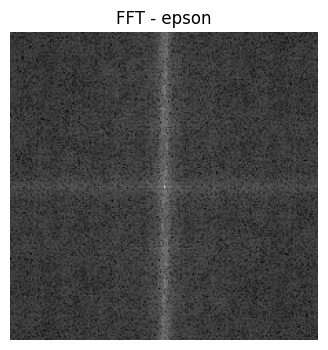

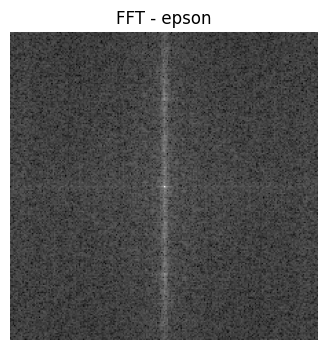

In [7]:
def fft_extract(img):
    img = img.squeeze()

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude = np.log(np.abs(fshift) + 1)

    return magnitude

def fft_v(img, title="FFT Spectrum"):
    fft_mag = fft_extract(img)

    plt.figure(figsize=(4,4))
    plt.imshow(fft_mag, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
    
fft_v(X[0], f"FFT - {y[0]}")
fft_v(X[50], f"FFT - {y[50]}")

In [21]:
!pip install scikit-image

  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/5f/ee/c53a009e3997dda9d285402f19226fbd17b5b3cb215da391c4ed084a1424/scikit_image-0.25.2-cp310-cp310-win_amd64.whl.metadata
  Using cached scikit_image-0.25.2-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Obtaining dependency information for scipy>=1.11.4 from https://files.pythonhosted.org/packages/d1/84/55bc4881973d3f79b479a5a2e2df61c8c9a04fcb986a213ac9c02cfb659b/scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for networkx>=3.0 from https://files.pythonhosted.org/packages/b9/54/dd730b32ea14ea797530a4479b2ed46a6fb250f682a9cfb997e968bf0261/networkx-3.4.2-py3-none-any.whl.metadata
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Obtaining dependency information for imageio!=2.35.0,>=2.33 from https://files.pythonhosted.org/packages/fb/fe/301e0936b79bcab4cacc7548bf2853fc28d

In [8]:
from skimage.feature import local_binary_pattern

def lbp(img, p=8, r=1):
    img = img.squeeze()
    img_uint8 = (img * 255).astype(np.uint8)

    lbp = local_binary_pattern(img_uint8, p, r, method='uniform')

    hist, _ = np.histogram(
        lbp.ravel(),
        bins=np.arange(0, p + 3),
        range=(0, p + 2)
    )

    hist = hist.astype("float")
    hist = hist/(hist.sum() + 1e-6)

    return hist

In [9]:
lbp_features = [] 
labels = [] 
for i in range(len(X)): 
    lbp_feat = lbp(X[i]) 
    lbp_features.append(lbp_feat) 
    labels.append(y[i]) 
    
lbp_features = np.array(lbp_features) 
labels = np.array(labels)

In [10]:
lbp_features

array([[0.01652184, 0.0741191 , 0.0040059 , ..., 0.14419244, 0.2051977 ,
        0.28288425],
       [0.00374681, 0.03134965, 0.0009367 , ..., 0.16274713, 0.27108578,
        0.22853555],
       [0.13630022, 0.1169882 , 0.04207191, ..., 0.1078404 , 0.15662867,
        0.25546078],
       ...,
       [0.00769292, 0.04980469, 0.00145488, ..., 0.15124761, 0.22718033,
        0.27184311],
       [0.08759168, 0.14337532, 0.02692522, ..., 0.1113082 , 0.15906011,
        0.2948023 ],
       [0.02553013, 0.10411352, 0.00376674, ..., 0.1276706 , 0.19746492,
        0.32581314]])